# Autoscaling for MongoDB

## Horizontal Scaling by Adding Replicas (CPU Utilization Triggered)

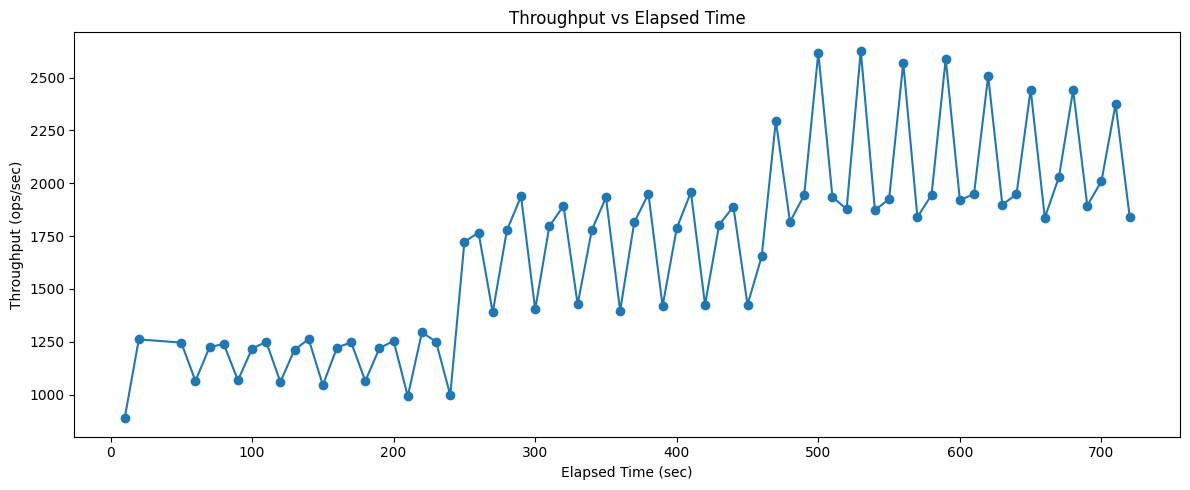

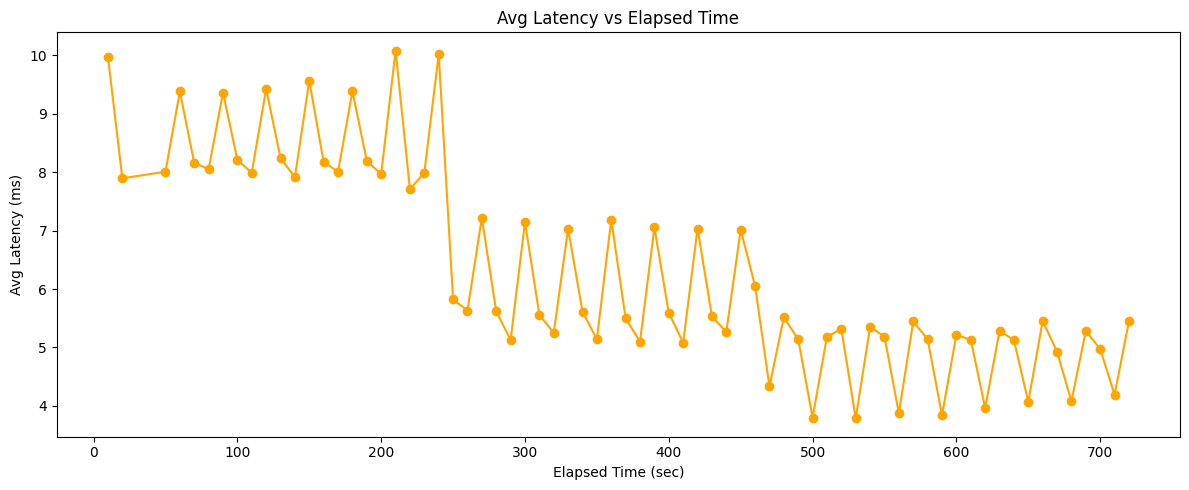

In [3]:
import matplotlib.pyplot as plt
import re

times = []
throughputs = []
latencies = []

with open('t10_cpu.log') as f:
    for line in f:
        if line.startswith('#OUTLIER'):
            continue
        # Match lines with elapsed sec, ops/sec, and Avg latency
        match = re.search(r'(\d+) sec:.*? ([\d.]+) current ops/sec;.*Avg=([\d.]+)', line)
        if match:
            elapsed_sec = int(match.group(1))
            times.append(elapsed_sec)
            throughputs.append(float(match.group(2)))
            latencies.append(float(match.group(3)) / 1000)

# Plot throughput vs elapsed time
plt.figure(figsize=(12, 5))
plt.plot(times, throughputs, marker='o')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Throughput (ops/sec)')
plt.title('Throughput vs Elapsed Time')
plt.tight_layout()
plt.show()

# Plot avg latency vs elapsed time
plt.figure(figsize=(12, 5))
plt.plot(times, latencies, marker='o', color='orange')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Avg Latency (ms)')
plt.title('Avg Latency vs Elapsed Time')
plt.tight_layout()
plt.show()

## Horizontal Scaling by Adding Replicas (IOWait Triggered)

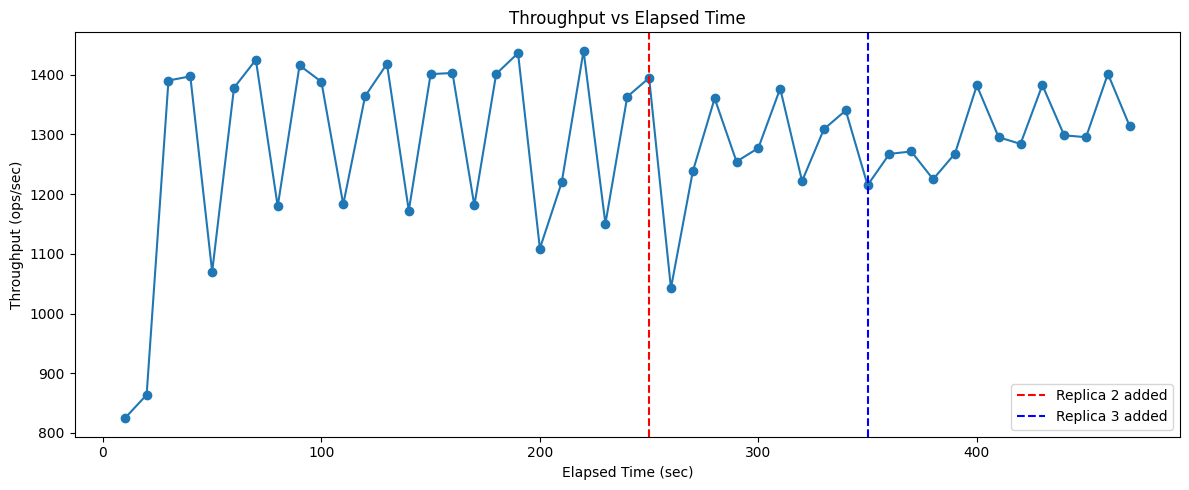

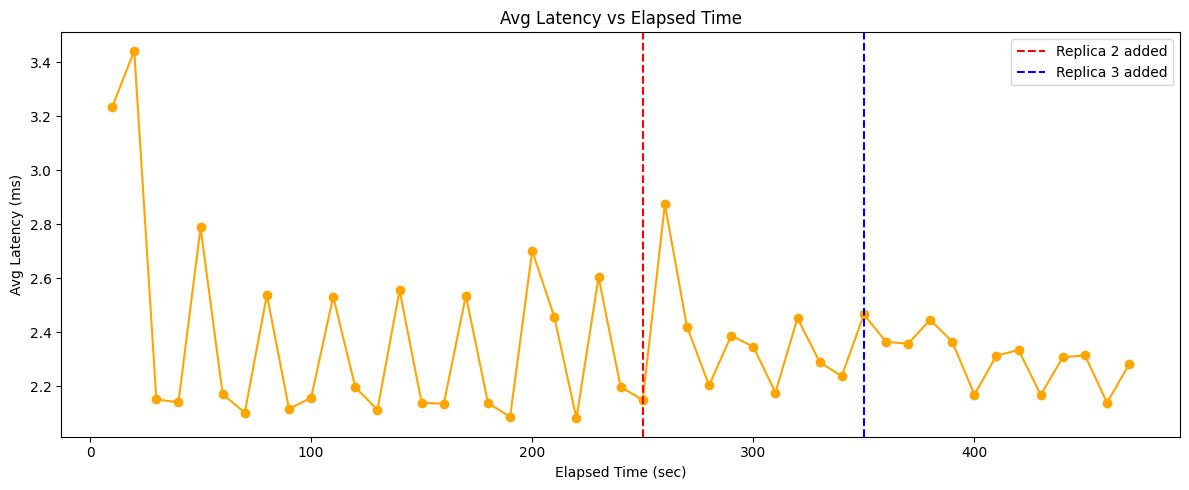

In [4]:
import matplotlib.pyplot as plt
import re

times = []
throughputs = []
latencies = []

with open('t3_iowait.log') as f:
    for line in f:
        if line.startswith('#OUTLIER'):
            continue
        # Match lines with elapsed sec, ops/sec, and Avg latency
        match = re.search(r'(\d+) sec:.*? ([\d.]+) current ops/sec;.*Avg=([\d.]+)', line)
        if match:
            elapsed_sec = int(match.group(1))
            times.append(elapsed_sec)
            throughputs.append(float(match.group(2)))
            latencies.append(float(match.group(3)) / 1000)

# Plot throughput vs elapsed time
plt.figure(figsize=(12, 5))
plt.plot(times, throughputs, marker='o')
plt.axvline(x=250, color='red', linestyle='--', label='Replica 2 added')
plt.axvline(x=350, color='blue', linestyle='--', label='Replica 3 added')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Throughput (ops/sec)')
plt.title('Throughput vs Elapsed Time')
plt.legend()
plt.tight_layout()
plt.show()

# Plot avg latency vs elapsed time
plt.figure(figsize=(12, 5))
plt.plot(times, latencies, marker='o', color='orange')
plt.axvline(x=250, color='red', linestyle='--', label='Replica 2 added')
plt.axvline(x=350, color='blue', linestyle='--', label='Replica 3 added')
plt.xlabel('Elapsed Time (sec)')
plt.ylabel('Avg Latency (ms)')
plt.title('Avg Latency vs Elapsed Time')
plt.legend()
plt.tight_layout()
plt.show()